In [50]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf 

In [51]:
insurance_data = pd.read_csv('insurance.csv')
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [52]:
## Seperating the dataset

x = insurance_data.drop(['charges', 'sex', 'region', 'smoker'], axis=1)
yy = insurance_data['charges']

x.shape, yy.shape

((1338, 3), (1338,))

In [53]:
from sklearn.model_selection import train_test_split

## Splitting the dataset
x_train, x_test, yy_train, yy_test = train_test_split(x, yy, test_size=0.3, random_state=42)

In [54]:
len(x_train ) == len(yy_train)

True

In [55]:
## Building first neural network 
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=10, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='relu')
], name='model_A')

model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mse']
)

history = model.fit(x_train, yy_train, epochs=100)

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 215646.5469 - mse: 325470176.0000 
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 215646.5469 - mse: 325470176.0000
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 215646.5469 - mse: 325470176.0000
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 215646.5469 - mse: 325470176.0000
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 215646.5469 - mse: 325470176.0000
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 215646.5469 - mse: 325470176.0000
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 215646.5469 - mse: 325470176.0000
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 215646.5469 - mse: 325470176.0000
Epoch 9/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 215646.5469 - mse: 325470176.0000
Epoch 10/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 215646.5469 - mse: 325470176.0000 
Epoch 11/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 215646.

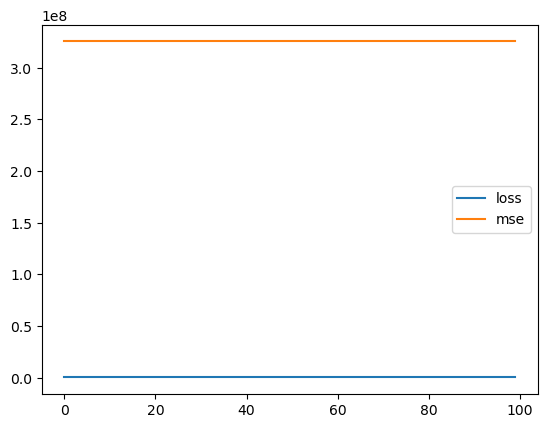

In [56]:
loss_red = pd.DataFrame(history.history)
loss_red.plot()
plt.show()

<Axes: >

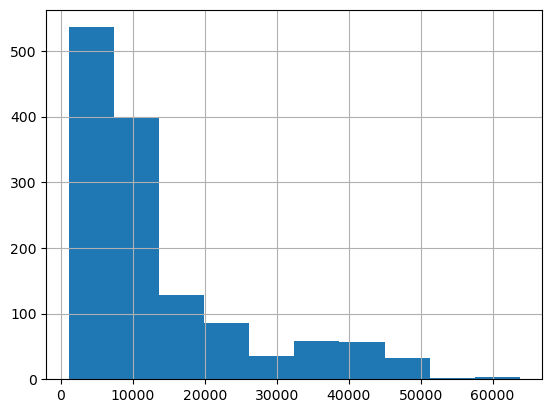

In [181]:
## Using all the features in the dataset using get_dummies() method to bin our category data

binned_insurance_data = pd.get_dummies(insurance_data, dtype=float)
binned_insurance_data.head()

insurance_data['charges'].hist()

In [108]:
## Seperating our features from label 
X = binned_insurance_data.drop('charges', axis=1)
y = binned_insurance_data['charges'].to_frame()

X.shape, y.shape

((1338, 11), (1338, 1))

In [109]:
## Split testing dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=22)

In [110]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='linear')
], name='Model_B')

model_1.compile(
    loss = tf.keras.losses.mse,
    optimizer = tf.keras.optimizers.Adam(0.001),
    metrics = ['mse']
)

history = model_1.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 318472416.0000 - mse: 318472416.0000
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 303884928.0000 - mse: 303884928.0000
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 231309728.0000 - mse: 231309728.0000
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 138428096.0000 - mse: 138428096.0000
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 127915944.0000 - mse: 127915944.0000
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 127624824.0000 - mse: 127624824.0000 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 126866584.0000 - mse: 126866584.0000
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 126271448.0000 - mse: 126271448.0000
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 125661360.0000 - mse: 125661360.0000
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 125052912.0000 - mse: 125052912.0000
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━

<Axes: >

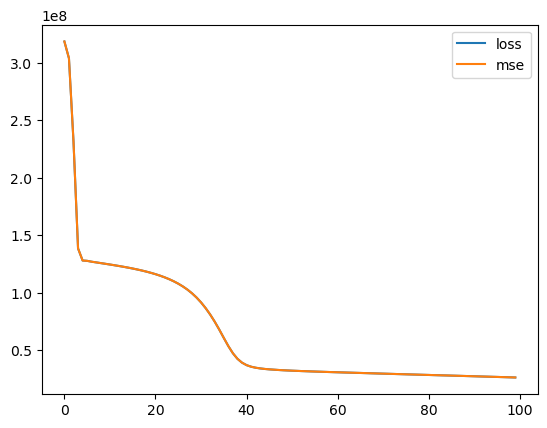

In [111]:
pd.DataFrame(history.history).plot()

In [112]:
model_1.evaluate(X_test, y_test)
# X_test.shape, y_test.shape

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 27124812.0000 - mse: 27124812.0000


[27124812.0, 27124812.0]

In [113]:
y_test.mean().squeeze()

13476.570634895525

In [114]:
model_2 = tf.keras.Sequential([
    # tf.keras.layers.Dense(units=100, activation='relu'),
    # tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(units=100, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='linear')
], name='Model_B')

model_2.compile(
    loss = tf.keras.losses.mse,
    optimizer = tf.keras.optimizers.Adam(0.01),
    metrics= ['mse']
)

history = model_2.fit(X_train, y_train, epochs=150)

Epoch 1/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 315117344.0000 - mse: 315117344.0000
Epoch 2/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 290972704.0000 - mse: 290972704.0000
Epoch 3/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 241306416.0000 - mse: 241306416.0000
Epoch 4/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 183026656.0000 - mse: 183026656.0000
Epoch 5/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 143860672.0000 - mse: 143860672.0000
Epoch 6/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 130214656.0000 - mse: 130214656.0000
Epoch 7/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 127553728.0000 - mse: 127553728.0000
Epoch 8/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 126732720.0000 - mse: 126732720.0000
Epoch 9/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 126125200.0000 - mse: 126125200.0000
Epoch 10/150
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 125561592.0000 - mse: 125561592.0000
Epoch 11/150
32/32 ━━━━━━━━━━━━━━━━━━━━

<Axes: >

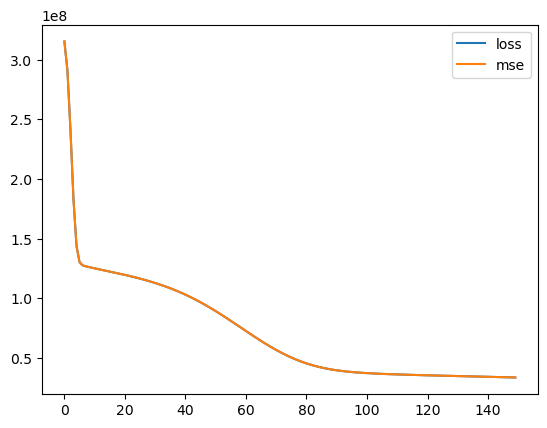

In [115]:
pd.DataFrame(history.history).plot()

In [175]:
## Performing feature scalling on my dataset 
from sklearn.preprocessing import StandardScaler, OneHotEncoder
preprocessor = StandardScaler()
X_train_transform = preprocessor.fit_transform(X_train)
X_test_transform = preprocessor.transform(X_test)

In [182]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(units=20, activation='relu'),
    tf.keras.layers.Dense(units=50, activation='relu'),
    tf.keras.layers.Dense(units=30, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='linear')
], name='Model_3')

model_3.compile(
    loss = tf.keras.losses.mse,
    optimizer= tf.keras.optimizers.Adam(0.001),
    metrics=['mse']
)

history = model_3.fit(X_train_transform, y_train, epochs=80)

Epoch 1/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 319742784.0000 - mse: 319742784.0000
Epoch 2/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 319635520.0000 - mse: 319635520.0000
Epoch 3/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 319229472.0000 - mse: 319229472.0000
Epoch 4/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 317822496.0000 - mse: 317822496.0000
Epoch 5/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 314096160.0000 - mse: 314096160.0000
Epoch 6/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 306059264.0000 - mse: 306059264.0000
Epoch 7/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 291217888.0000 - mse: 291217888.0000
Epoch 8/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 267181392.0000 - mse: 267181392.0000
Epoch 9/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 232739072.0000 - mse: 232739072.0000
Epoch 10/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 189296048.0000 - mse: 189296048.0000
Epoch 11/80
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

<Axes: >

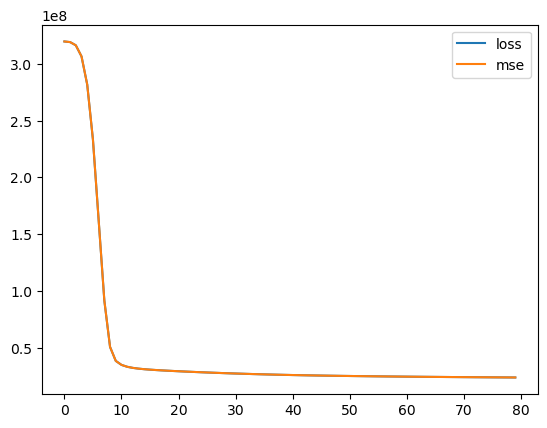

In [177]:
pd.DataFrame(history.history).plot()

In [178]:
model_3.summary()

Model: "Model_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_142 (Dense)               │ (None, 50)             │           600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_143 (Dense)               │ (None, 100)            │         5,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_144 (Dense)               │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_145 (Dense)               │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32,405 (126.59 KB)

 Trainable params: 10,801 (42.19 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 21,604 (84.39 KB)

In [179]:
# model_3.evaluate(X_train_transform, y_train_transform)

In [180]:
y_pred = model_3.predict(X_test_transform)
y_pred

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


array([[17025.39  ],
       [18258.83  ],
       [13077.967 ],
       [12623.185 ],
       [ 3778.654 ],
       [17999.885 ],
       [13849.465 ],
       [46400.332 ],
       [34548.05  ],
       [ 8987.927 ],
       [ 4737.1216],
       [24668.94  ],
       [13965.717 ],
       [11784.325 ],
       [ 6004.815 ],
       [11503.985 ],
       [ 3975.575 ],
       [ 8997.81  ],
       [ 8391.922 ],
       [ 7426.3003],
       [17895.914 ],
       [ 2764.0376],
       [13974.584 ],
       [13069.072 ],
       [12537.442 ],
       [28775.545 ],
       [25495.096 ],
       [12238.482 ],
       [14658.393 ],
       [ 7682.212 ],
       [10598.884 ],
       [10010.682 ],
       [ 8334.521 ],
       [ 7212.7905],
       [ 8307.426 ],
       [28866.197 ],
       [ 3121.775 ],
       [25658.2   ],
       [ 4844.003 ],
       [28440.938 ],
       [ 6408.55  ],
       [11243.41  ],
       [ 8654.089 ],
       [19965.78  ],
       [13005.769 ],
       [ 4517.1987],
       [10106.971 ],
       [ 8363

In [163]:
y_test

,charges
1231,20167.33603
768,14319.03100
847,2438.05520
510,11763.00090
363,2597.77900
...,...
1091,11286.53870
1001,34472.84100
969,8596.82780
342,13217.09450


In [173]:
model_3.evaluate(X_test_transform, y_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 26789136.0000 - mse: 26789136.0000


[26789136.0, 26789136.0]

In [190]:
from sklearn.metrics import mean_squared_error

mse = np.sqrt(mean_squared_error(y_pred.squeeze(), y_test))
mse

5262.492755339431

In [191]:
y_test.mean()

charges    13476.570635
dtype: float64